In [1]:
!pip install --upgrade "jax[cuda]" -f https://storage.googleapis.com/jax-releases/jax_releases.html

Looking in links: https://storage.googleapis.com/jax-releases/jax_releases.html


In [3]:
import jax
import jax.numpy as jnp
from jax.typing import ArrayLike
import matplotlib.pyplot as plt
jax.config.update("jax_enable_x64", True) # To improve precision of GPU computation
import math

In [14]:
def number_regions(Di:int, D:int)->int:
  # TODO -- implement Zaslavsky's formula
  # You will need to use math.factorial() https://www.geeksforgeeks.org/factorial-in-python/
  # Replace this code
  N=0
  for j in range(1,Di+1):
    N+=1/(math.factorial(D-j)*math.factorial(j))

  N = math.factorial(D)* N +1

  return N


In [15]:


# Calculate the number of regions for 2D input (Di=2) and 3 hidden units (D=3) as in figure 3.8j
N = number_regions(2, 3)
print(f"Di=2, D=3, Number of regions = {int(N)}, True value = 7")



Di=2, D=3, Number of regions = 7, True value = 7


In [16]:
# Calculate the number of regions for 10D input (Di=2) and 50 hidden units (D=50)
N = number_regions(10, 50)
print(f"Di=10, D=50, Number of regions = {int(N)}, True value = 13432735556")


Di=10, D=50, Number of regions = 13432735555, True value = 13432735556


In [17]:
# Show that calculation fails when

try:
  N = number_regions(10, 8)
  print(f"Di=10, D=8, Number of regions = {int(N)}, True value = 256")
except Exception as error:
    print("An exception occurred:", error)

An exception occurred: factorial() not defined for negative values


Counting regions for 1 input dimensions
Counting regions for 5 input dimensions
Counting regions for 10 input dimensions
Counting regions for 50 input dimensions
Counting regions for 100 input dimensions


<ipython-input-25-0ec9a3f00682>:21: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xlim([0,1000])


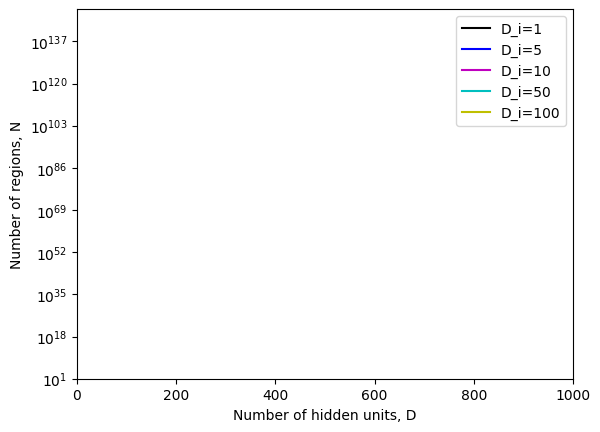

In [25]:
# Now let's plot the graph from figure 3.9a
import numpy as np

dims = jnp.array([1,5,10,50,100])
regions = jnp.zeros((dims.shape[0], 1000))
for c_dim in range(dims.shape[0]):
    D_i = dims[c_dim]
    print (f"Counting regions for {D_i} input dimensions")
    for D in range(100):
        regions.at[c_dim, D].set(number_regions(np.min([D_i,D]), D))

fig, ax = plt.subplots()
ax.semilogy(regions[0,:],'k-')
ax.semilogy(regions[1,:],'b-')
ax.semilogy(regions[2,:],'m-')
ax.semilogy(regions[3,:],'c-')
ax.semilogy(regions[4,:],'y-')
ax.legend(['D_i=1', 'D_i=5','D_i=10', 'D_i=50', 'D_i=100'])
ax.set_xlabel("Number of hidden units, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0,1000])
plt.ylim([1e1,1e150])
plt.show()

In [ ]:
# Now let's compute and plot the number of regions as a function of the number of parameters as in figure 3.9b
# First let's write a function that computes the number of parameters as a function of the input dimension and number of hidden layers (assuming just one output)

def number_parameters(D_i, D):
  # TODO -- replace this code with the proper calculation
  N = 1

  return N ;

In [ ]:


# Now let's test the code
N = number_parameters(10, 8)
print(f"Di=10, D=8, Number of parameters = {int(N)}, True value = 90")



In [ ]:
# Now let's plot the graph from figure 3.9a (takes ~1min)
dims = np.array([1,5,10,50,100])
regions = np.zeros((dims.shape[0], 200))
params = np.zeros((dims.shape[0], 200))

# We'll compute the five lines separately this time to make it faster
for c_dim in range(dims.shape[0]):
    D_i = dims[c_dim]
    print (f"Counting regions for {D_i} input dimensions")
    for c_hidden in range(1, 200):
        # Iterate over different ranges of number hidden variables for different input sizes
        D = int(c_hidden * 500 / D_i)
        params[c_dim, c_hidden] =  D_i * D +1 + D +1
        regions[c_dim, c_hidden] = number_regions(np.min([D_i,D]), D)

fig, ax = plt.subplots()
ax.semilogy(params[0,:], regions[0,:],'k-')
ax.semilogy(params[1,:], regions[1,:],'b-')
ax.semilogy(params[2,:], regions[2,:],'m-')
ax.semilogy(params[3,:], regions[3,:],'c-')
ax.semilogy(params[4,:], regions[4,:],'y-')
ax.legend(['
=1', '
=5', '
=10', '
=50', '
=100'])
ax.set_xlabel("Number of parameters, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0,100000])
plt.ylim([1e1,1e150])
plt.show()